In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

path = 'AirPassengers.csv'
df = pd.read_csv(path)
df.columns = ['Date','Number of Passengers']
df.head()

Date  Number of Passengers
0  1949-01                   112
1  1949-02                   118
2  1949-03                   132
3  1949-04                   129
4  1949-05                   121

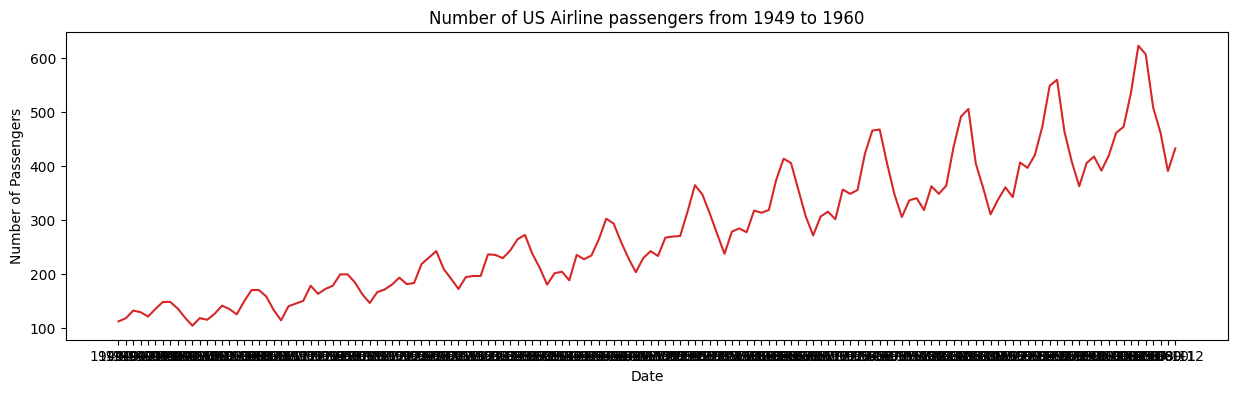

In [8]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

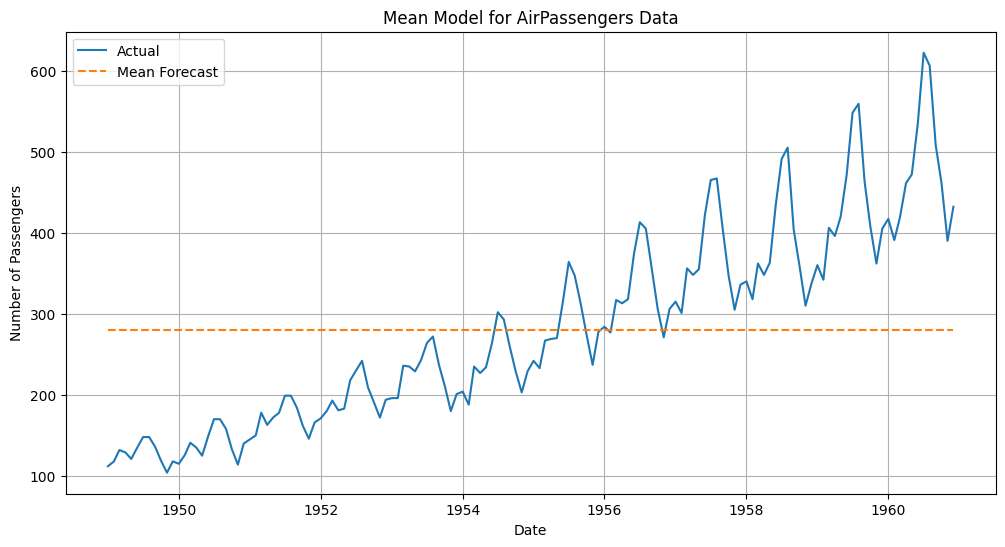

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date (just to be sure it's in chronological order)
#df.sort_values('Date', inplace=True)

df['Mean_Forecast'] = df['Number of Passengers'].mean()

# Plot the original data and the mean forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Number of Passengers'], label='Actual')
plt.plot(df['Date'], df['Mean_Forecast'], label='Mean Forecast', linestyle='--')
plt.title('Mean Model for AirPassengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

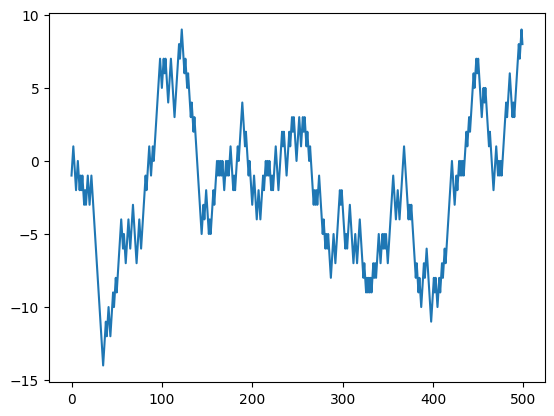

In [12]:
from random import seed,random
from matplotlib import pyplot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 500):
 movement = -1 if random() < 0.5 else 1
 value = random_walk[i-1] + movement
 random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

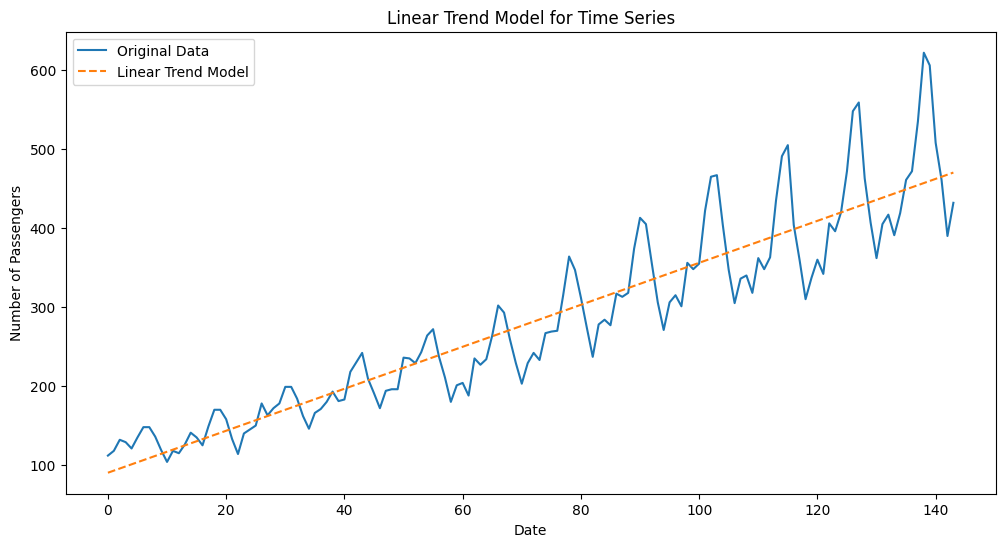

In [13]:
from sklearn.linear_model import LinearRegression

# Extract the time index as numerical values (for regression)
df['time_index'] = np.arange(len(df))

regression_model = LinearRegression()
regression_model.fit(df[['time_index']], df['Number of Passengers'])

trend = regression_model.predict(df[['time_index']])

# Plot the original data and the linear trend model
plt.figure(figsize=(12, 6))
plt.plot(df['Number of Passengers'], label='Original Data')
plt.plot(df.index, trend, label='Linear Trend Model', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Linear Trend Model for Time Series')
plt.legend()
plt.show()